# Data analysis of rewards / measures

In this notebook, some statistics will be applied to recorded measures of 500 runs of a random baseline agent and a rule-based, reactive agent

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats
import seaborn as sns


### Get the data from the csv files

In [23]:
random_agent_data = pd.read_csv("random_agent.csv")
rule_based_agent_data = pd.read_csv("rule_based_agent.csv")

print(random_agent_data.head().to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  objects\_moved &  hiders\_movement &  seekers\_movement &  hiders\_reward &  seekers\_reward \\
\midrule
0 &             11 &        35.368175 &         22.773506 &          -46.0 &            46.0 \\
1 &              0 &        35.250690 &         22.206462 &           -6.0 &             6.0 \\
2 &             18 &        35.774457 &         20.508501 &          -34.0 &            34.0 \\
3 &             81 &        33.688452 &         24.799887 &           48.0 &           -48.0 \\
4 &             81 &        35.448061 &         19.689268 &            0.0 &             0.0 \\
\bottomrule
\end{tabular}



In [3]:
print(random_agent_data.mean())
print(rule_based_agent_data.mean())

objects_moved       34.236473
hiders_movement     34.351547
seekers_movement    20.560247
hiders_reward      -13.070140
seekers_reward      13.070140
dtype: float64
objects_moved       26.162325
hiders_movement     17.493710
seekers_movement    13.220787
hiders_reward      -32.080160
seekers_reward      32.080160
dtype: float64


Averaging the 500 rows suggests a few things. Firstly, hiders seem to move more than seekers in both agents. Random agents also seem to move around more than rule-based agents. Lastly, rewards favour seekers in both agents, more so in the rule-based agent. To test statistical difference, the independent t-test will be used.

In [4]:
print(stats.wilcoxon(random_agent_data['objects_moved'], rule_based_agent_data['objects_moved']))
print(stats.wilcoxon(random_agent_data['hiders_movement'], rule_based_agent_data['hiders_movement']))
print(stats.wilcoxon(random_agent_data['seekers_movement'], rule_based_agent_data['seekers_movement']))
print(stats.wilcoxon(random_agent_data['hiders_reward'], rule_based_agent_data['hiders_reward']))
print(stats.wilcoxon(random_agent_data['seekers_reward'], rule_based_agent_data['seekers_reward']))

WilcoxonResult(statistic=39846.5, pvalue=1.0773515297452514e-06)
WilcoxonResult(statistic=44.0, pvalue=2.4005983823851117e-83)
WilcoxonResult(statistic=1649.0, pvalue=3.320588704044363e-79)
WilcoxonResult(statistic=19816.5, pvalue=4.069273610896518e-36)
WilcoxonResult(statistic=19816.5, pvalue=4.069273610896518e-36)


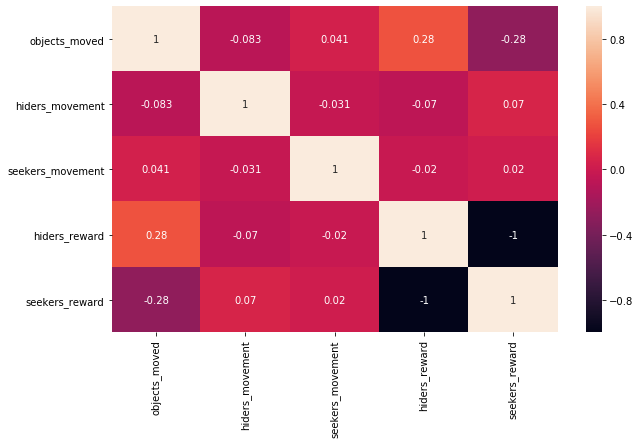

In [20]:
df = random_agent_data.corr()
fig, ax = plt.subplots(figsize=(10,6))
sns_plot = sns.heatmap(df, annot=True, ax=ax)
sns_plot.get_figure().savefig("random_correlations.png", bbox_inches='tight')

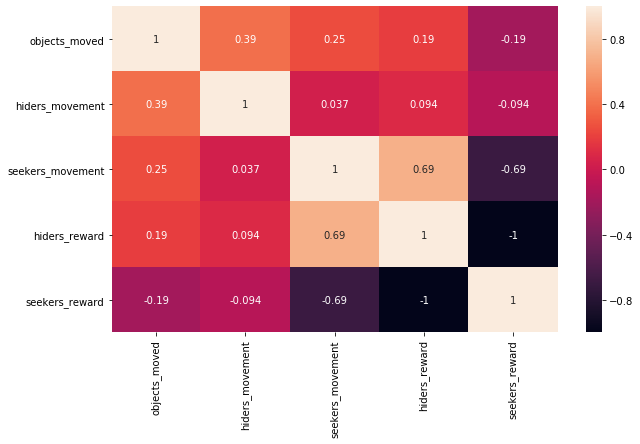

In [21]:
df = rule_based_agent_data.corr()
fig, ax = plt.subplots(figsize=(10,6))
sns_plot = sns.heatmap(df, annot=True, ax=ax)
sns_plot.get_figure().savefig("rule_based_correlations.png", bbox_inches='tight')

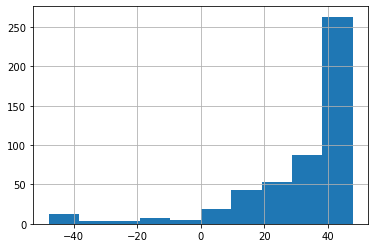

In [6]:
rule_based_agent_data['seekers_reward'].hist()

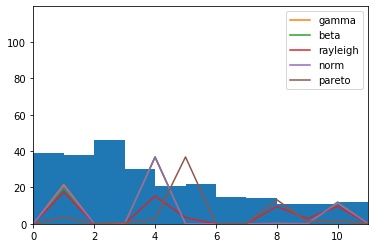

In [12]:
size = 500
x = random_agent_data["hiders_reward"]
y = scipy.int_(scipy.round_(scipy.stats.vonmises.rvs(5,size=size)*11))
h = plt.hist(y, bins=range(12))

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,11)
plt.legend(loc='upper right')
plt.show()

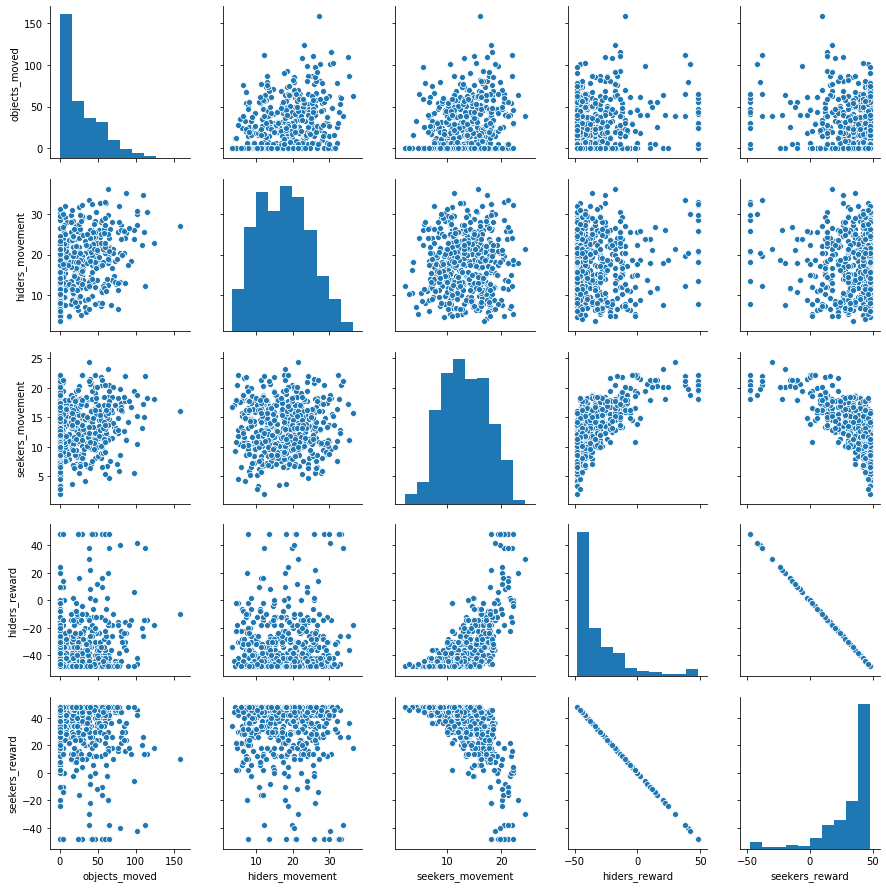

In [14]:
sns_plot = sns.pairplot(rule_based_agent_data, size=2.5)

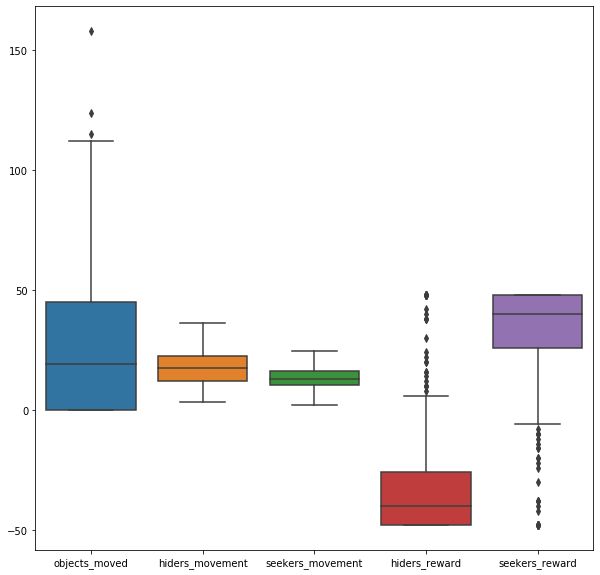

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=rule_based_agent_data, ax=ax)

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=random_agent_data, ax=ax)